In [2]:
!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [39]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [13]:
df=pd.read_csv("C:/Users/ragu/Min_pj_3/kidney_disease - kidney_disease.csv")

In [43]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [35]:
# Show all columns
pd.set_option('display.max_columns', None)  
print(df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  \
0  121.0  36.0  1.2  138.0  4.4  15.4  44  7800  5.2  yes  yes  no  good   no   
1  121.0  18.0  0.8  138.0  4.4  11.3  38  6000  5.2   no   no  no  good   no   
2  423.0  53.0  1.8  138.0  4.4   9.6  31  7500  5.2   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4  138.0  4.4  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no  

In [ ]:
# EDA 

In [23]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [28]:
#filling mode for categorical columns 
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [30]:
#filling median for numerical coloumns 
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

In [34]:
#secon check for null values
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [31]:
df.shape

(400, 26)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [19]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [20]:
df.nunique()

id                400
age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                43
wc                 90
rc                 46
htn                 2
dm                  2
cad                 2
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

In [21]:
df.duplicated().sum()

0

In [37]:
# Convert numerical-like object columns to float
for col in ['pcv', 'wc', 'rc']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [40]:
#Label encoding to the column 
le = LabelEncoder()
df[['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']] = df[['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']].apply(lambda col: le.fit_transform(col))

df.head()

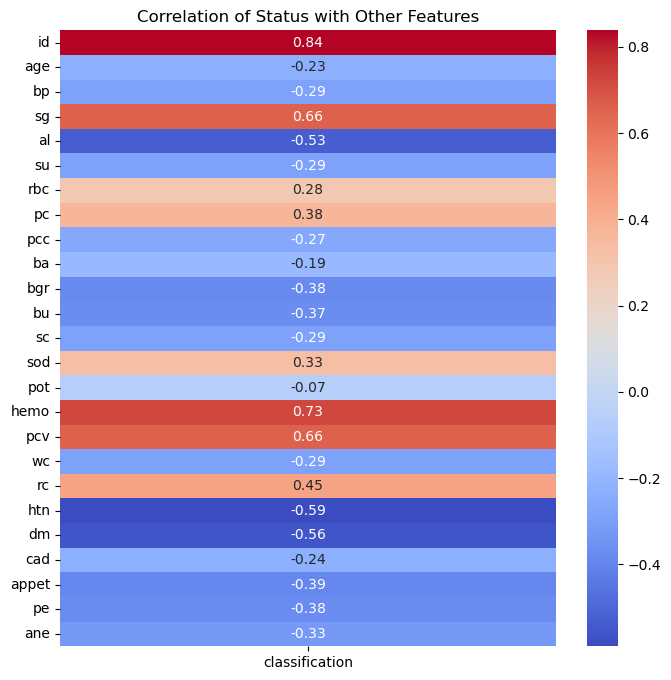

In [46]:
# Compute correlation of "Status" with all other columns
correlation_matrix = df.corr()[["classification"]].drop(index="classification")

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Status with Other Features")
plt.show()

In [ ]:
#Based on this observation these are the data that CKD present and not present prediction  
# "hemo", "sg", "pcv", "rc", "pc", "htn", "dm", "al", "appet", "bgr" 

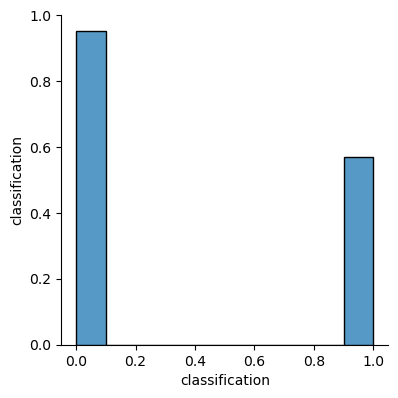

In [47]:
#Univariate analysis
sns.pairplot(df[["classification"]],height=4)
plt.show()

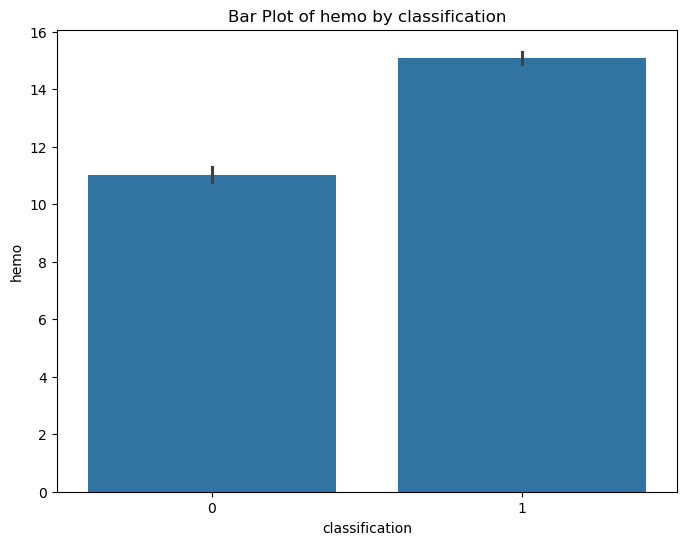

In [48]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="hemo", data=df)  
plt.title("Bar Plot of hemo by classification")
plt.show()

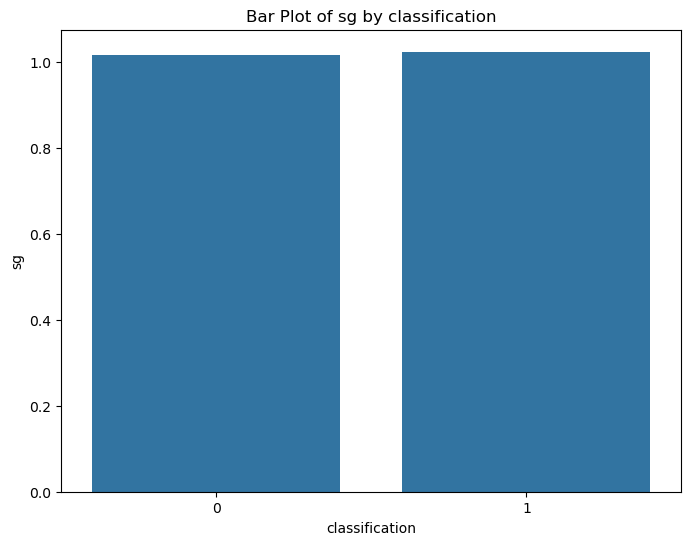

In [50]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="sg", data=df)  
plt.title("Bar Plot of sg by classification")
plt.show()

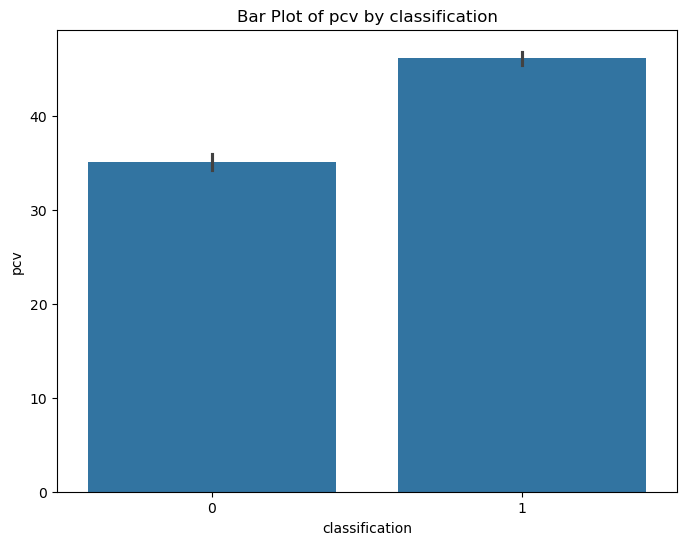

In [51]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="pcv", data=df)  
plt.title("Bar Plot of pcv by classification")
plt.show()

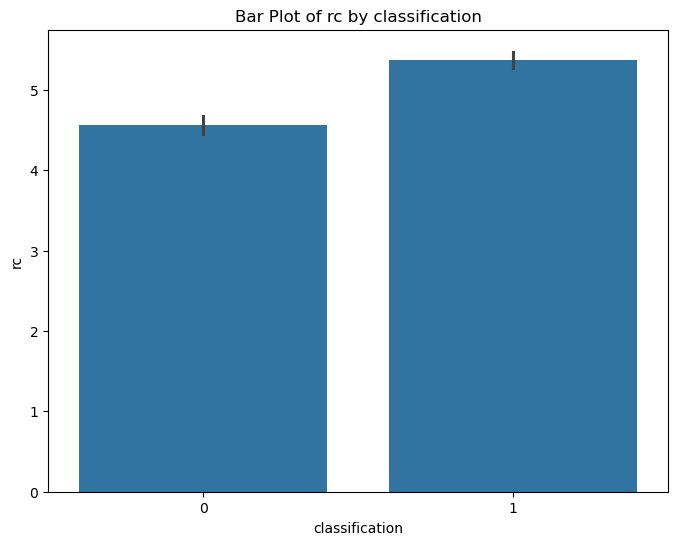

In [52]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="rc", data=df)  
plt.title("Bar Plot of rc by classification")
plt.show()

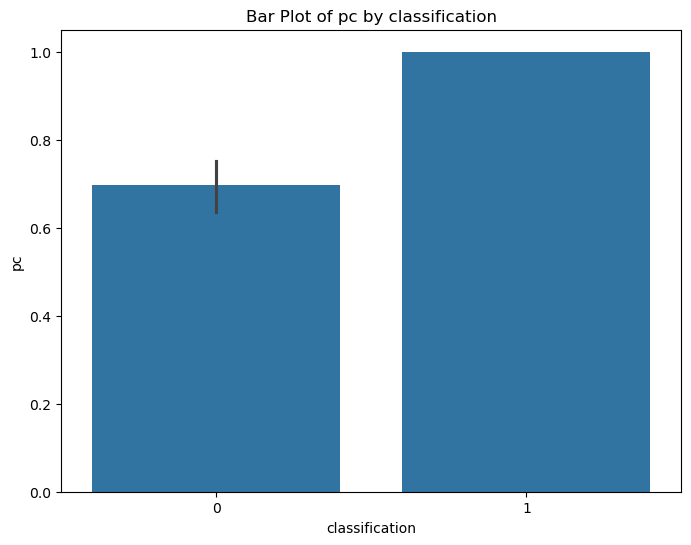

In [53]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="pc", data=df)  
plt.title("Bar Plot of pc by classification")
plt.show()

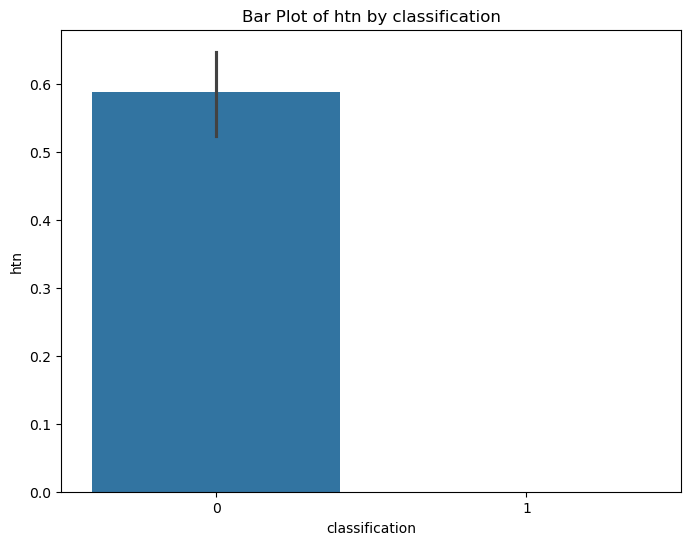

In [54]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="htn", data=df)  
plt.title("Bar Plot of htn by classification")
plt.show()

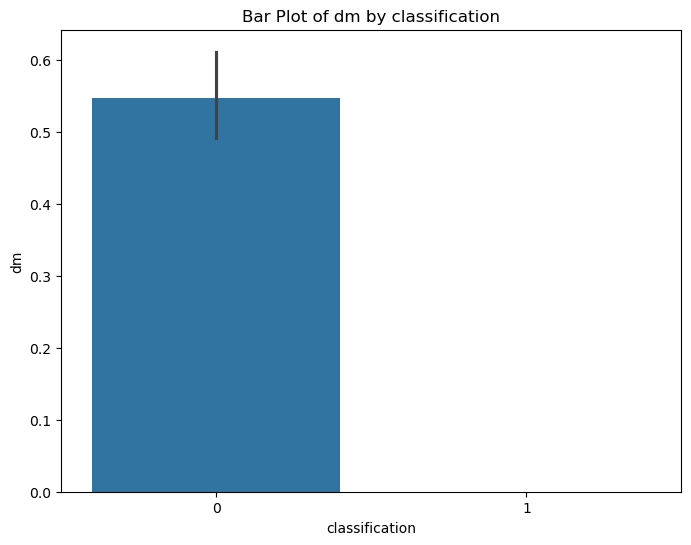

In [55]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="dm", data=df)  
plt.title("Bar Plot of dm by classification")
plt.show()

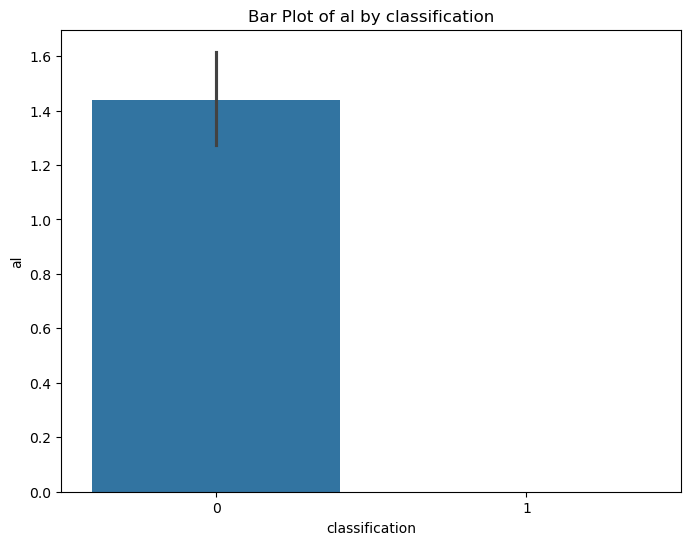

In [56]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="al", data=df)  
plt.title("Bar Plot of al by classification")
plt.show()

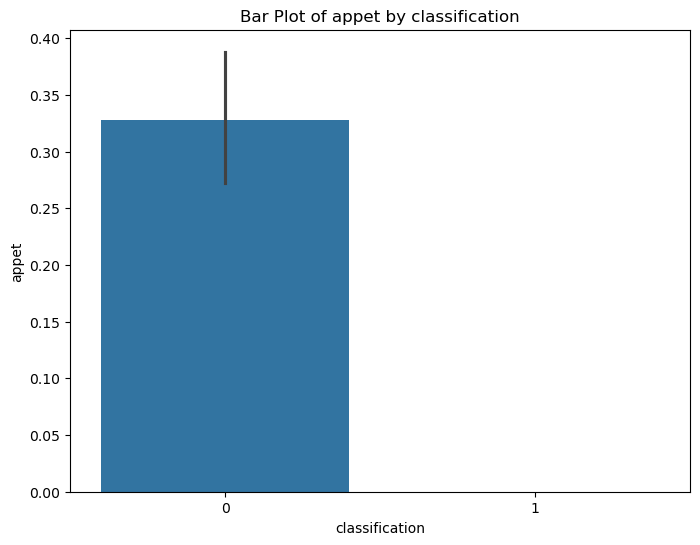

In [57]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="appet", data=df)  
plt.title("Bar Plot of appet by classification")
plt.show()

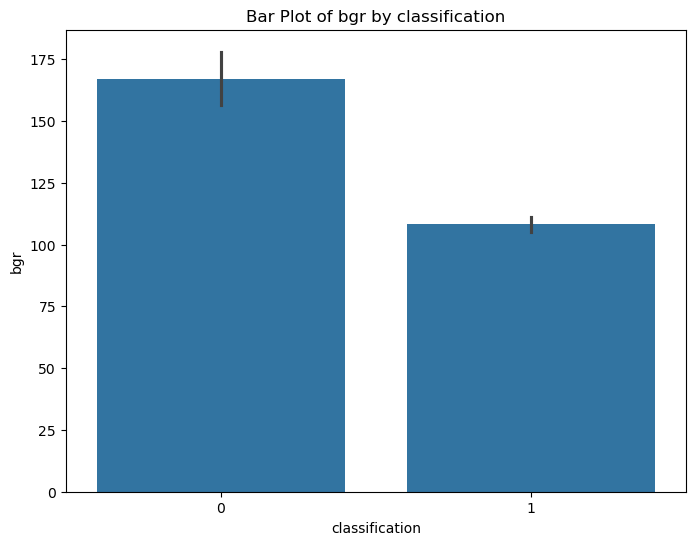

In [58]:
#Bivariate analysis
plt.figure(figsize=(8, 6))
sns.barplot(x="classification", y="bgr", data=df)  
plt.title("Bar Plot of bgr by classification")
plt.show()

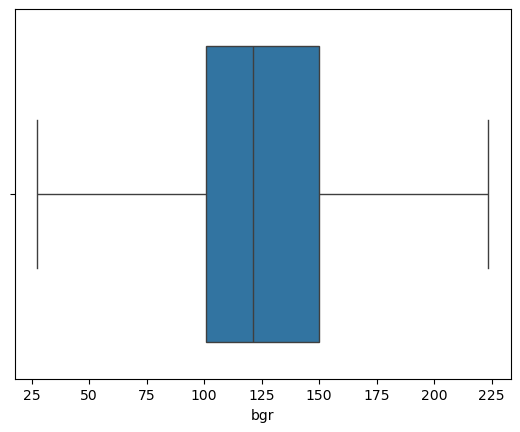

In [78]:
#finding outliers #(Outliers Treated)
# "hemo", "sg", "pcv", "rc", "pc", "htn", "dm", "al", "appet", "bgr" 
sns.boxplot(x=df['bgr'])  
plt.show()

In [77]:
#caping the outlaires (Treated)
Q1 = df["bgr"].quantile(0.25)
Q3 = df["bgr"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["bgr"] = np.where(df["bgr"] < lower_bound, lower_bound, df["bgr"])
df["bgr"] = np.where(df["bgr"] > upper_bound, upper_bound, df["bgr"])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int32  
 7   pc              400 non-null    int32  
 8   pcc             400 non-null    int32  
 9   ba              400 non-null    int32  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             399 non-null    float64
 17  wc              399 non-null    flo

In [80]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [212]:
# NOT DONE

#Define features and target
X = df1.drop(columns=['classification'])  # Replace 'status' with your target column
y = df1['classification']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE with a slightly higher sampling strategy
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Increase the ratio to get more samples
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
unique, counts = np.unique(y_smote, return_counts=True)
print("After SMOTE:", dict(zip(unique, counts)))

# Compute required class counts
num_class_1 = counts[1]  # Get count of class 1
target_class_0 = 195 - num_class_1  # Ensure total count is exactly 195

# Apply undersampling only if necessary
if counts[0] > target_class_0:
    undersample = RandomUnderSampler(sampling_strategy={0: target_class_0}, random_state=42)
    X_resampled, y_resampled = undersample.fit_resample(X_smote, y_smote)
else:
    X_resampled, y_resampled = X_smote, y_smote  # Keep data if no undersampling needed

# Check final class distribution
print("After final undersampling:", np.bincount(y_resampled))
print("Total samples after resampling:", len(y_resampled))

After SMOTE: {0: 94, 1: 118}
After final undersampling: [ 77 118]
Total samples after resampling: 195


In [82]:
y = df['classification']

In [234]:
y = y_resampled

In [83]:
print(y.tail())

395    1
396    1
397    1
398    1
399    1
Name: classification, dtype: int32


In [84]:
df.corr()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,1.000000,-0.186274,-0.245378,0.583117,-0.468924,-0.247181,0.231457,0.335825,-0.264142,-0.115955,-0.331484,-0.299054,-0.263262,0.316549,-0.071029,0.612087,0.564305,-0.245144,0.427064,-0.520089,-0.475106,-0.205575,-0.374394,-0.308120,-0.273096,0.838528
age,-0.186274,1.000000,0.136316,-0.160621,0.085918,0.186750,-0.014904,-0.102286,0.157401,0.042427,0.277046,0.194291,0.133985,-0.086040,0.049399,-0.179011,-0.215780,0.121262,-0.221817,0.395073,0.364306,0.231419,0.156581,0.094772,0.052938,-0.227842
bp,-0.245378,0.136316,1.000000,-0.167818,0.123518,0.189561,-0.150384,-0.156231,0.056808,0.110164,0.180743,0.180841,0.143184,-0.100705,0.063667,-0.278639,-0.282769,0.041065,-0.207515,0.266901,0.226489,0.084135,0.175054,0.056902,0.195134,-0.293693
sg,0.583117,-0.160621,-0.167818,1.000000,-0.478805,-0.296901,0.246777,0.360787,-0.303133,-0.232599,-0.351427,-0.247404,-0.172045,0.209203,-0.054960,0.493574,0.498455,-0.240915,0.396064,-0.325840,-0.353204,-0.136490,-0.230476,-0.247285,-0.184261,0.664697
al,-0.468924,0.085918,0.123518,-0.478805,1.000000,0.287751,-0.394844,-0.561713,0.417868,0.377935,0.309609,0.347418,0.161310,-0.225612,0.107893,-0.472814,-0.472687,0.214263,-0.392408,0.406057,0.308101,0.200957,0.303145,0.411080,0.229556,-0.531562
su,-0.247181,0.186750,0.189561,-0.296901,0.287751,1.000000,-0.092940,-0.190062,0.168091,0.119399,0.571945,0.126897,0.096434,-0.051758,0.177396,-0.156955,-0.182739,0.161569,-0.160518,0.254268,0.430514,0.229301,0.069216,0.116442,0.042464,-0.294555
rbc,0.231457,-0.014904,-0.150384,0.246777,-0.394844,-0.092940,1.000000,0.377394,-0.102948,-0.184402,-0.155572,-0.233935,-0.135660,0.139037,0.020473,0.282642,0.282795,-0.021473,0.167988,-0.140538,-0.145646,-0.111493,-0.160868,-0.199285,-0.107625,0.282642
pc,0.335825,-0.102286,-0.156231,0.360787,-0.561713,-0.190062,0.377394,1.000000,-0.520118,-0.330401,-0.268854,-0.344501,-0.158038,0.171171,-0.155434,0.409747,0.412914,-0.108285,0.373823,-0.291719,-0.201032,-0.172295,-0.274985,-0.350227,-0.260566,0.375154
pcc,-0.264142,0.157401,0.056808,-0.303133,0.417868,0.168091,-0.102948,-0.520118,1.000000,0.275082,0.199036,0.189094,0.054429,-0.138816,-0.011416,-0.272992,-0.294014,0.158617,-0.236981,0.195623,0.165236,0.188029,0.189688,0.104356,0.175861,-0.265313
ba,-0.115955,0.042427,0.110164,-0.232599,0.377935,0.119399,-0.184402,-0.330401,0.275082,1.000000,0.106539,0.161676,0.053959,-0.082156,-0.001944,-0.206947,-0.190554,0.095966,-0.195991,0.089046,0.080070,0.162395,0.149126,0.134732,0.052208,-0.186871


In [85]:
features_scale = ["hemo", "sg", "pcv", "rc", "pc", "htn", "dm", "al", "appet", "bgr"]

In [86]:
scaler = MinMaxScaler()

In [88]:
#featurs 
df_scaled = df.copy()
df_scaled[features_scale] = scaler.fit_transform(df[features_scale])

In [89]:
#featurs 
X_scaled = df_scaled[features_scale]

In [90]:
print(X_scaled.head())

       hemo        sg       pcv        rc   pc  htn   dm   al  appet       bgr
0  0.808765  0.714286  0.714286  0.625000  1.0  1.0  1.0  0.2    0.0  0.477041
1  0.482072  0.714286  0.542857  0.625000  1.0  0.0  0.0  0.8    0.0  0.477041
2  0.346614  0.142857  0.342857  0.625000  1.0  0.0  1.0  0.4    1.0  1.000000
3  0.474104  0.000000  0.371429  0.160714  0.0  1.0  0.0  0.8    1.0  0.456633
4  0.505976  0.142857  0.457143  0.410714  1.0  0.0  0.0  0.4    0.0  0.400510


In [91]:
#features 
X = X_scaled

In [92]:
type(X_scaled)

pandas.core.frame.DataFrame

In [107]:
X.isnull().sum()

hemo     0
sg       0
pcv      0
rc       0
pc       0
htn      0
dm       0
al       0
appet    0
bgr      0
dtype: int64

In [106]:
X["rc"] = X["rc"].fillna(X["rc"].median())

C:\Users\ragu\AppData\Local\Temp\ipykernel_13664\3576685044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["rc"] = X["rc"].fillna(X["rc"].median())


In [93]:
type(y)

pandas.core.series.Series

In [44]:
# X_scaled = featurs
# y_traget = target 

In [94]:
print(f"X shape: {X.shape}, y shape: {y.shape}")  # Debugging

if len(X) != len(y):
    y = y.iloc[:len(X)]  # Ensure y has the same length as X


X shape: (400, 10), y shape: (400,)


In [96]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [97]:
# Split into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
Lr = LogisticRegression(random_state=0)

In [108]:
logreg = Lr.fit(X, y)

In [133]:
y_pred = logreg.predict(x_test)  # Predict using test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6500


In [132]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = Lr.predict(X)  # Use trained model to predict

print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

Accuracy: 0.9850
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       250
           1       0.96      1.00      0.98       150

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400

Confusion Matrix:
 [[244   6]
 [  0 150]]


In [134]:
import joblib

# Save the model
joblib.dump(Lr, "logistic_regression_model.pkl")

# Load the model (when needed)
loaded_model = joblib.load("logistic_regression_model.pkl")

# Test the loaded model
y_pred_loaded = loaded_model.predict(X)
print(f"Loaded Model Accuracy: {accuracy_score(y, y_pred_loaded):.4f}")

Loaded Model Accuracy: 0.9850


In [ ]:
 Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Use the loaded model for predictions
y_pred = loaded_model.predict(x_test)